In [3]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mping
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [4]:
gpu_available = tf.config.list_physical_devices('GPU')

if gpu_available:
    print("GPU available:", gpu_available)
    # Check GPU utilization
    for gpu in gpu_available:
        print("GPU utilization:", tf.config.experimental.get_memory_growth(gpu))
else:
    print("No GPU available, running on CPU.")

GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU utilization: None


2024-04-20 15:35:06.790077: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-04-20 15:35:06.790790: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2024-04-20 15:35:06.803914: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-04-20 15:35:06.803998: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 4090 computeCapability: 8.9
coreClock: 2.52GHz coreCount: 128 deviceMemorySize: 23.63GiB deviceMemoryBandwidth: 938.86GiB/s
2024-04-20 15:35:06.804009: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2024-04-20 15:35:06.805078: I tensorflow/stream_executor/platform/d

In [5]:
train_directory = "train"
image_paths = []
classifications = []
random.seed(0)
num_classes = 0

for subdirectory in os.listdir(train_directory):
    if(subdirectory == "code"):
        continue
    print(subdirectory)
    num_classes += 1
    for image_name in os.listdir(os.path.join(train_directory, subdirectory)):
        image_path = os.path.join(train_directory, subdirectory, image_name)
        image_paths.append(image_path)
        classifications.append(subdirectory)

# Stack image_paths and classifications vertically to create a structured array
training_data = np.column_stack((image_paths, classifications))

# If you want to shuffle the data, you can do it like this
random.shuffle(training_data)

gpu
hdd
case
monitor
cpu
motherboard
ram
mouse


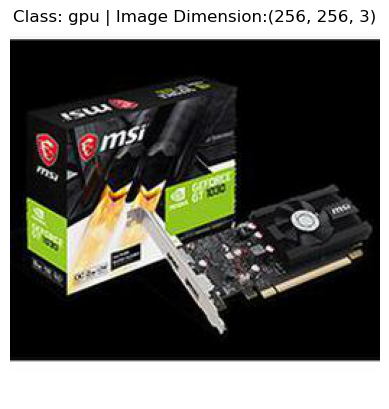

In [6]:
index = 0

img = mping.imread(training_data[index][0])
plt.imshow(img)
plt.axis('off')
plt.title("Class: " +  training_data[index][1] + " | Image Dimension:" + str(img.shape))
plt.show()

In [7]:
processed_images = []
labels = []
batch_size = 32

for row in training_data:
    # Load image path and label from each row
    image_path, label = row

    # Load image and preprocess it
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0  # Rescale pixel values to [0,1]

    # Append preprocessed image and label to lists
    processed_images.append(img_array)
    labels.append(label)

In [8]:
one_hot_encoder = OneHotEncoder()
labels_one_hot = one_hot_encoder.fit_transform(np.array(labels).reshape(-1, 1)).toarray()
train_images, val_images, train_labels, val_labels = train_test_split(
    processed_images, labels_one_hot, test_size=0.05, random_state=0
)
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(buffer_size=len(train_images)).batch(batch_size)
validation_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels)).shuffle(buffer_size=len(val_images)).batch(batch_size)

2024-04-20 15:35:16.379770: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-20 15:35:16.380746: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-04-20 15:35:16.380860: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-04-20 15:35:16.380939: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 4090 computeCapability: 8.9
coreClock: 2.52GHz coreCount: 128 deviceMemorySize: 23.63GiB deviceMemoryBandwidth: 938.86

In [9]:
import model
classifier = model.ResNetClassifier(num_classes)
classifier.compile_model()
classifier.fit(train_dataset, batch_size=32, epochs=20, validation_data=validation_dataset)

Epoch 1/20


2024-04-20 15:39:02.580581: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2024-04-20 15:39:02.588292: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2995200000 Hz
2024-04-20 15:39:02.899482: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2024-04-20 15:39:48.125823: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7


In [ ]:
evaluation_results = classifier.evaluate(validation_dataset)
print("Evaluation results:", evaluation_results)

6/6 [==============================] - 1s 173ms/step - loss: 1.6762 - accuracy: 0.4819
Evaluation results: [1.6761680841445923, 0.4819277226924896]
